In [91]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [92]:
#Dataset

In [93]:
x,y = make_regression(n_samples=100, n_features=1, noise=10)

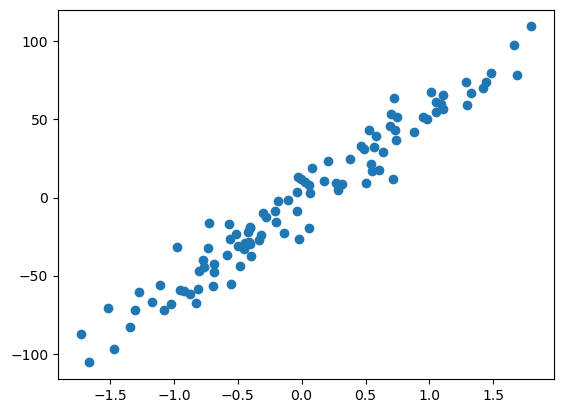

In [94]:
plt.scatter(x,y)

In [95]:
print(x.shape)
y = y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


In [96]:
X=np.hstack((x,np.ones(x.shape)))

In [97]:
theta = np.random.randn(2,1)
print(theta)

[[ 1.53233839]
 [-0.66986061]]


In [98]:
# Model

In [99]:
def model(X,theta):
    return X.dot(theta)

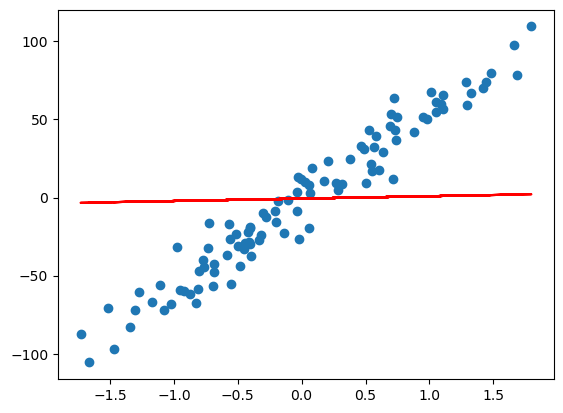

In [100]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

In [101]:
#La fonction Cout

In [102]:
def cost_function(X,y,theta):
    m = len(y)
    return (1/2*m) * np.sum((model(X,theta) - y)**2 )

cost_function(X,y,theta)

11027043.15582378

In [103]:
# gradient

In [104]:
def grad(X,y,theta):
    m=len(y)
    return (1/m) * X.T.dot( model(X,theta) - y )

grad(X,y,theta)

array([[-38.25180601],
       [  1.14624755]])

In [105]:
# descente de gradient

In [106]:
def grad_descent(X,y,theta,learning_rate,n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0,n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta,cost_history


In [107]:
# Machine learning

In [108]:
theta_final,cost_history = grad_descent(X,y,theta,learning_rate=0.01, n_iteration=1000)

In [109]:
# Predictions

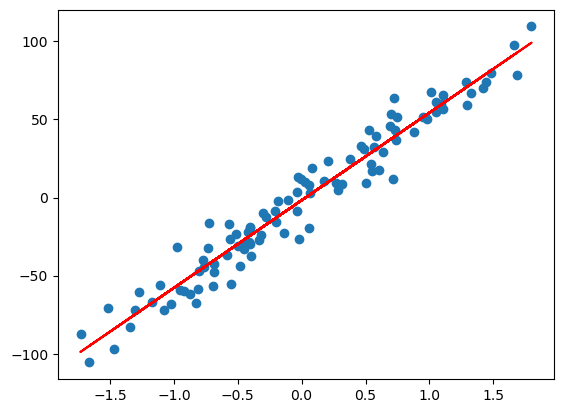

In [110]:
plt.scatter(x,y)
predictions = model(X,theta_final)
plt.plot(x,predictions,c='r')

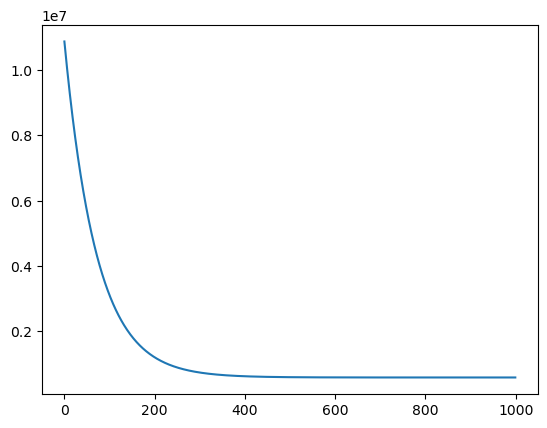

In [111]:
plt.plot(range(0,1000),cost_history)

In [112]:
# Coefition de determination

In [113]:
def coef_det(y,pred):
    u = (( y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_det(y,predictions)

0.949949368879214